## SVM Regressor test

In [1]:
# import libraries
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# imports
import os
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Enable python to import modules from parent directory
import sys
sys.path.append("..")

from src.config import *

# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None

### SVM Example

In [2]:
"""
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()
"""

'\nprint(__doc__)\n\nimport numpy as np\nfrom sklearn.svm import SVR\nimport matplotlib.pyplot as plt\n\n# #############################################################################\n# Generate sample data\nX = np.sort(5 * np.random.rand(40, 1), axis=0)\ny = np.sin(X).ravel()\n\n# #############################################################################\n# Add noise to targets\ny[::5] += 3 * (0.5 - np.random.rand(8))\n\n# #############################################################################\n# Fit regression model\nsvr_rbf = SVR(kernel=\'rbf\', C=100, gamma=0.1, epsilon=.1)\nsvr_lin = SVR(kernel=\'linear\', C=100, gamma=\'auto\')\nsvr_poly = SVR(kernel=\'poly\', C=100, gamma=\'auto\', degree=3, epsilon=.1,\n               coef0=1)\n\n# #############################################################################\n# Look at the results\nlw = 2\n\nsvrs = [svr_rbf, svr_lin, svr_poly]\nkernel_label = [\'RBF\', \'Linear\', \'Polynomial\']\nmodel_color = [\'m\', \'c\', \'g\']\

In [3]:
# Get dataframe from CSV file
curated_data_path = os.path.join(DATA_CLEAN_PATH, "ml-curated-data.csv")
data_curated = pd.read_csv(curated_data_path)
data_curated.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816,0.028896


In [4]:
# Separate columns in attributes(X) and labels(Y)
X = data_curated.drop('wage_increase', axis=1)
y = data_curated['wage_increase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Traing the algorithm

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [5]:
X_train.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
3011,0.071004,0.148005,-0.003860,-0.007198,0.117600,0.029939,0.015783,0.019090,0.016816
493,-0.232559,0.606962,0.225386,0.276901,0.025845,-0.075147,0.022788,0.019090,0.026167
4949,0.028853,0.067886,-0.030296,-0.064368,0.045749,0.146876,0.020887,0.019090,0.016816
9744,-0.050343,-0.005553,0.028583,0.001384,-0.038907,-0.017880,0.018543,0.017736,0.014807
4313,0.131664,0.018951,-0.126474,-0.034227,0.001044,0.071505,0.018799,0.019090,0.015862


In [6]:
y_train.head()

3011   -0.075759
493     0.104269
4949   -0.026281
9744    0.114543
4313    0.002408
Name: wage_increase, dtype: float64

In [7]:
# Plot function
def plot(x_trn, y_trn, y_prd, column_name, mod_color, graph_title, y_label ):
    # plot the X selected column with the y train column
    plt.scatter(x_trn[column_name], y_trn, color=mod_color)
    # plot the X selected column with the y predicted column
    plt.plot(x_trn[column_name], y_prd, color='red')
    plt.title(graph_title + ' (Support Vector Regression Model)')
    plt.xlabel(column_name)
    plt.ylabel(y_label)
    plt.show()
    
def plot_error(df_e):
    df_e.plot.kde()
    plt.title("Error distribution")
    plt.xlabel("Error")
    plt.grid()
    plt.show()

    100 * df_errors.describe()

def plot_density(df_d):
    df_d.y.plot.kde(c='r')
    df_d.y_estimate.plot.kde(c='b')
    plt.title("Kernel Density Estimation")
    plt.grid()
    plt.show()

def plot_Est_Org(df_eo):
    plt.plot(df_eo.y, df_eo.y_estimate, '.b')
    plt.plot(df_eo.y, test_results.y, '.r')
    plt.title("Estimate VS Original")
    plt.grid()
    plt.show()

### SVM Regressor examples (RBF, Linear, Polynomial)

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train.values.ravel())
print(y_train_encoded)

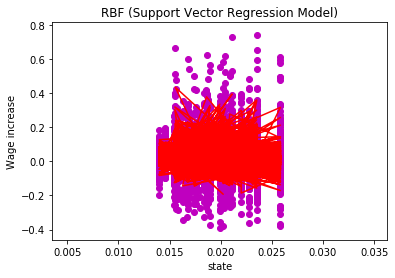

53.26395655432805
7.2982159843572765


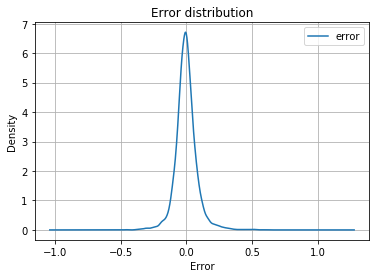

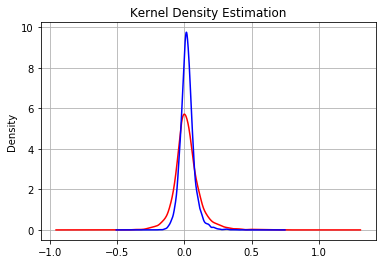

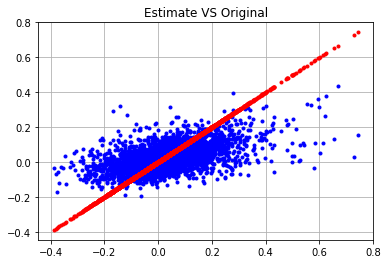

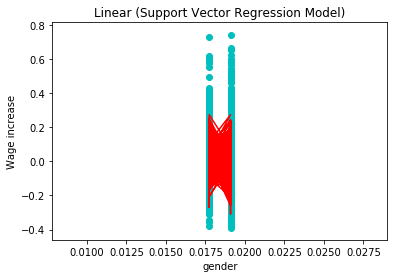

55.92577864910224
7.478354006671672


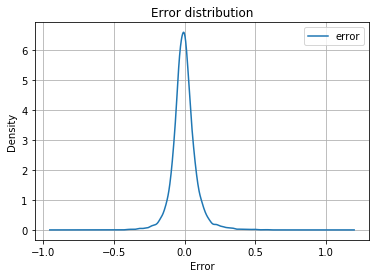

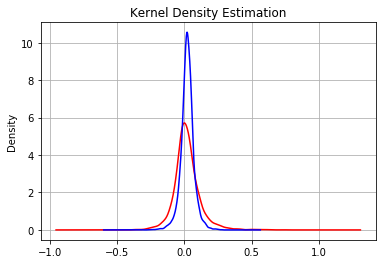

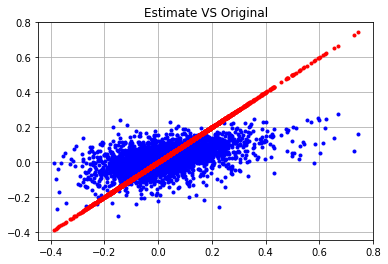

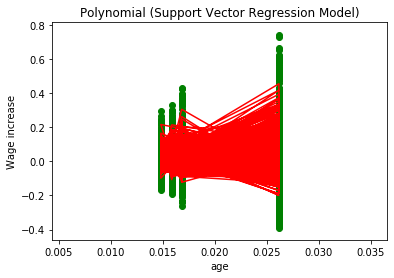

53.17795110407794
7.292321379648454


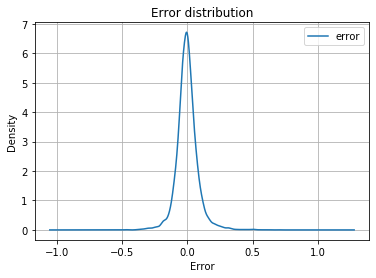

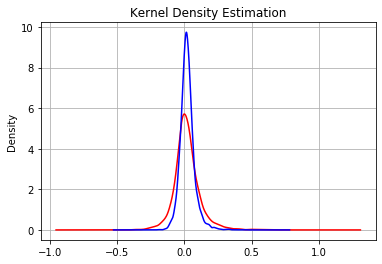

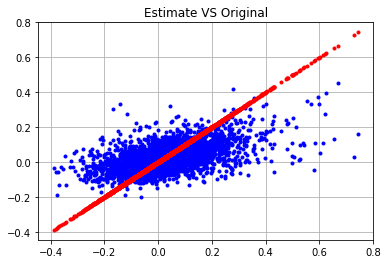

In [8]:
# Look at the results
lw = 2

# Declaration of vectors
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']
x_column = ['state', 'gender', 'age']

#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for ix, svr in enumerate(svrs):
    svr.fit(X_train,y_train)
    
    # predict
    y_pred = svr.predict(X_train)

    # Visualising the Support Vector Regression results
    plot(X_train,y_train, y_pred, x_column[ix], model_color[ix], kernel_label[ix], "Wage increase" )
    
    # Square Medium Error (SME)
    error = np.asmatrix(y_train.values - y_pred)
    sme = (error * error.T / len(error)).tolist()[0][0]
    print(sme)

    print(np.sqrt(sme))
    
    df_errors = pd.DataFrame({'error': [e for ls in error.tolist() for e in ls]})
    plot_error(df_errors)
    
    test_results = pd.DataFrame(
        {
        "y": y_train,
        "y_estimate": y_pred#[e for ls in y_pred.to_frame() for e in ls]
        }
    )

    100 * test_results.describe()
    
    plot_density(test_results)
    plot_Est_Org(test_results)

### SVM Regressor Single example

In [9]:
svr_rbf.fit(X_train,y_train)
# predict
y_pred = svr_rbf.predict(X_train)

# Visualising the Support Vector Regression results
#plot(X_train,y_train, y_pred, x_column[ix], model_color[ix], kernel_label[ix], "Wage increase" )

# Square Medium Error (SME)
error = np.asmatrix(y_train.values - y_pred)
y_train.shape

(7884,)

In [10]:
error

matrix([[-0.03887357,  0.06119751,  0.01538554, ..., -0.02378723,
          0.25535252, -0.07624955]])

In [11]:
error.shape

(1, 7884)

In [12]:
y_pred.tolist()

[-0.03688498545541785,
 0.04307183586474883,
 -0.04166646096556059,
 0.07687478624077704,
 0.021318231257251963,
 0.021829675082853495,
 0.07912414335632212,
 -0.02776876387703675,
 -0.012586524718914749,
 0.04694842623339701,
 0.017576135583110553,
 0.013733967011359649,
 0.0678578018576963,
 0.036325610181632495,
 -0.1197633530548523,
 0.03941354512173012,
 0.04120527827370557,
 -0.03088939018782577,
 0.06097036184001814,
 0.03797250444180866,
 0.010846719946127958,
 -0.0401738705028003,
 0.01783759251804673,
 0.11160611243101703,
 -0.029081439937203246,
 -0.00312430020311405,
 -0.05489652465871808,
 -0.05050895314629367,
 0.04799628933797129,
 0.05119601095895865,
 0.09309547571930699,
 0.0030261250933825146,
 0.06194098265919257,
 -0.04702237820531474,
 0.008228885727985524,
 0.05458598938494452,
 0.027853851510653893,
 0.023926445992470402,
 0.037483810126699435,
 -0.013020335987038667,
 0.04046540996845982,
 -0.010659561335133905,
 0.0048439052035553765,
 -0.014938610950439912,
 

53.26395655432805
7.2982159843572765


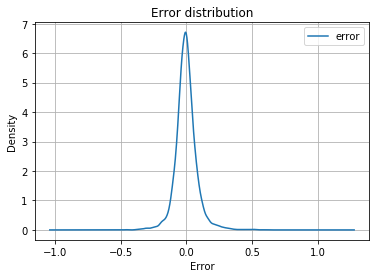

,y,y_estimate
count,788400.000000,788400.000000
mean,1.920582,2.154016
std,9.746810,5.301047
min,-38.831757,-19.275327
25%,-3.243904,-0.934325
50%,1.129316,1.782924
75%,6.183637,4.700840
max,74.360760,43.460514


In [13]:
sme = (error * error.T / len(error)).tolist()[0][0]
print(sme)

print(np.sqrt(sme))
    
df_errors = pd.DataFrame({'error': [e for ls in error.tolist() for e in ls]})
plot_error(df_errors)
    
test_results = pd.DataFrame(
    {
    "y": y_train,
    "y_estimate": y_pred #[e for ls in y_pred.tolist() for e in ls]
    }
)

100 * test_results.describe()

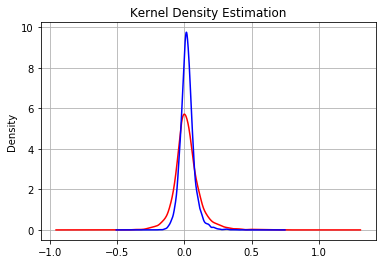

In [14]:
test_results.y.plot.kde(c='r')
test_results.y_estimate.plot.kde(c='b')
plt.title("Kernel Density Estimation")
plt.grid()
plt.show()

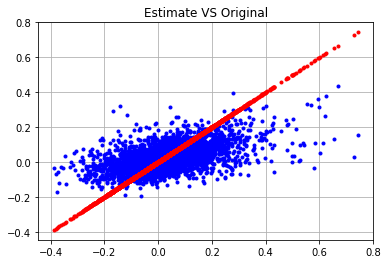

In [15]:
plt.plot(test_results.y, test_results.y_estimate, '.b')
plt.plot(test_results.y, test_results.y, '.r')
plt.title("Estimate VS Original")
plt.grid()
plt.show()

In [36]:
def get_random_params():
    return {
        "kernel": random.choice(["linear", "poly", "rbf", "sigmoid"]),
        "degree": random.choice(range(2,5)),
        "gamma": random.choice((range(10, 100))) / 100 ,
        "coef0": random.choice((range(10, 100))) / 100,
        "C": random.choice(range(1, 100)),
        "epsilon": random.choice((range(10, 50))) / 100
    }

In [37]:
param = get_random_params()
param

{'kernel': 'poly',
 'degree': 4,
 'gamma': 0.95,
 'coef0': 0.89,
 'C': 47,
 'epsilon': 0.37}

In [38]:
"""def get_rsme(df, param, target_col, features):
    train = df.sample(frac=0.7)
    test = df.drop(train.index)
    train_x = train.drop(target_col, 1)
    train_y = train.drop(features, 1)
    test_x = test.drop(target_col, 1)
    test_y = test.drop(features, 1)
    model=SVR(**param)
    model.fit(train_x, train_y)
    estimates = model.predict(train_x)
    error = np.asmatrix(train_y.values - estimates)
    sme = (error.T * error / len(error)).tolist()[0][0]
    return np.sqrt(sme)
"""

def get_rsme(param, target_col, features):
    #train = df.sample(frac=0.7)
    #test = df.drop(train.index)
    #train_x = train.drop(target_col, 1)
    #train_y = train.drop(features, 1)
    #test_x = test.drop(target_col, 1)
    #test_y = test.drop(features, 1)
    model=SVR(**param)
    model.fit(features, target_col)
    estimates = model.predict(features)
    error = np.asmatrix(target_col.values - estimates)
    sme = (error * error.T / len(error)).tolist()[0][0]
    return np.sqrt(sme)

In [39]:
#get_rsme(data_curated, param, target_col="wage_increase", features=[c for c in data_curated.columns if c != "wage_increase"])

get_rsme(param, y_train, X_train)

#X_train, X_test, y_train, y_test

9.085035050493316

In [ ]:
result = []
for i in range(100000):
    param = get_random_params()
    rsme = get_rsme(param, y_train, X_train)
    param["rsme"] = rsme
    param
    result.append( param)
result

In [50]:
np.savetxt("result100k.csv", result, delimiter=",", fmt='%s')

In [ ]:
list_rsmes = []
for i in range(len(result)):
    list_rsmes.append(result[i].get("rsme"))

minpos = list_rsmes.index(min(list_rsmes))
result[minpos]